# Basketball Dataset


## Description  
This is a dataset about a wide variety of NBA players and their seasonal statistics, dating to last few years -- from 2018 to 2022.  
This provides a total of 516 unique players.  
    
Attributes for the data include Player name, games played (G), minutes per game (MP), field goal percentage (FG%), 3-point field goal percentage (3P%), effective field goal percentage (eFG%), total rebound per game (TRB), assists per game (AST), steal per game (STL), blocks per game (BLK), points per game (PTS), player efficency rating (PER), true shooting percentage (TS%), win shares (WS), box plus/minues (BPM), value over replacement player (VORP).  
The classification we are trying to predict is the last element, All-star (no, yes).  


### Attributes Explained
##### Source: [Basketball Reference](https://www.basketball-reference.com/leagues/NBA_2021_per_game.html)
##### Format: CSV or excel spreadsheet  
##### Contents:  
|Attribute|Name in Dataset|Description|
|--|--|--|
|Points|PTS|Points Scored|
|Field Goal Percentage|FG%|Field Goals Attempted dividebd by Field Goals Made 
|Effective Field Goal Percentage|eFG|Field Goal Percentage adjust by the fact that free throws are worth one points and 3-Point Field Goals are worth three
|Total Rebounds|TRB|Combined total of offensive and defensive rebounds
|Player Efficiency Rating|PER|A measure of per-minute production standardized such that the league average is 15
|Offensive Win Shares|OWS|An estimate of the number of wins contributed by a player due to offense
|Defensive Win Shares|DWS|An estimate of the number of wins contributed by a player due to defense
|Offensive Box Plus Minus|OBPM|A box score estimate of the offensive points per 100 possesions a player contributed above a league-average player, translated to an average team
|Defensive Box Plus Minus|DBPM|A box score estimate of the defensive points per 100 possesions a player contributed above a league-average player, translated to an average team
|Value Over Replacement Player|VORP|A box score estimate of the points per 100 TEAM possesions that a player contributed above a replacement-level (-2.0) player, translated to an average team and prorated to an 82-game season. Multiply by 2.70 to convert to wins over replacement




## Data Preparation
First things first, we are going to load the data into our `MyPyTable` class from the previous PA.  
This will allow us to easily manipulate and retrieve data.  
We use the copy of the csv from the `input_data` folder and load it as demonstrated in the following code cell.  

In [37]:
from mypytable import *
import os

filename = os.path.join("input_data", "AllStarData.csv")
basketball_table = MyPyTable().load_from_file(filename)

# Histograms
Let's start with a very basic look at the dataset.  
Here's a series of charts looking at the distributrion of players by: 
1. Field Goal Percentage (FG%)
2. Steals (STL)
3. Win shares (WS)

### Code and Graph for Field Goal Percentage

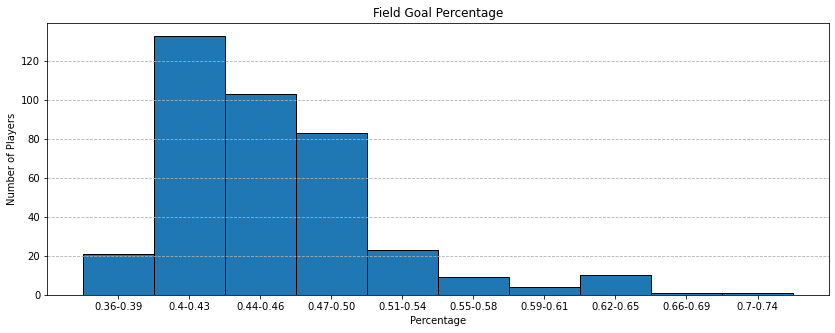

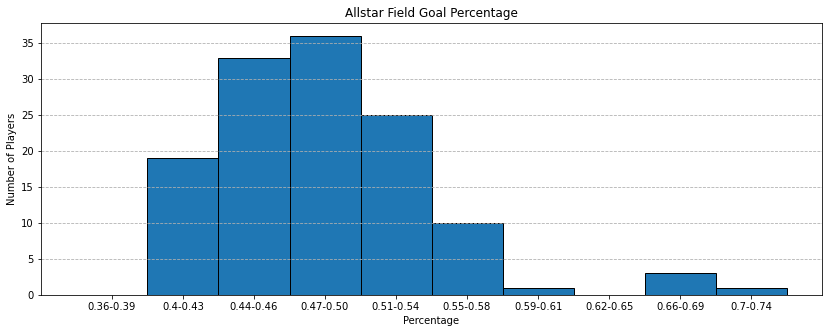

In [38]:
import utils
import plot_utils

fg3 = []
allstar_fg3 = []
for row in basketball_table.data:
    if row[-1] == 'no':
        fg3.append(row[0])
    else:
        allstar_fg3.append(row[0])
cutoffs = utils.compute_equal_width_cutoffs(fg3, 10)
fg3_freqs = utils.compute_bin_frequencies(fg3, cutoffs)
allstar_fg3_freqs = utils.compute_bin_frequencies(allstar_fg3, cutoffs)
x_axis = []
for i in range(len(cutoffs)-2):
    x_axis.append(f"{cutoffs[i]}-{format(cutoffs[i+1]-0.01, '.2f')}")
x_axis.append(f"{cutoffs[i+1]}-{format(cutoffs[i+2], '.2f')}")
plot_utils.bar_chart(x_axis, fg3_freqs, 'Field Goal Percentage', 'Percentage', 'Number of Players', grouped=True)
plot_utils.bar_chart(x_axis, allstar_fg3_freqs, 'Allstar Field Goal Percentage', 'Percentage', 'Number of Players', grouped=True)

## Field Goal Percentage Analysis
#### Non Allstar Data
The mode of the data is a percentage from 0.4 to 0.43. This is followed by 0.44-0.46, next is 0.47-0.50 before frequency drops off quickly.  
The least common grouping is 0.7-0.74, unsurprisingly, the hardest to achieve group is the least common.  
This provides a left skew to the data.
#### Allstar Data
This data is shifted to the center relative to the non-allstar data.  
That is to say, Allstars consistently have higher field goal percentage than non-allstar.  
However, this is not to say that every Allstar is better than every non-allstar.

### Code and Graph for Steals per Game

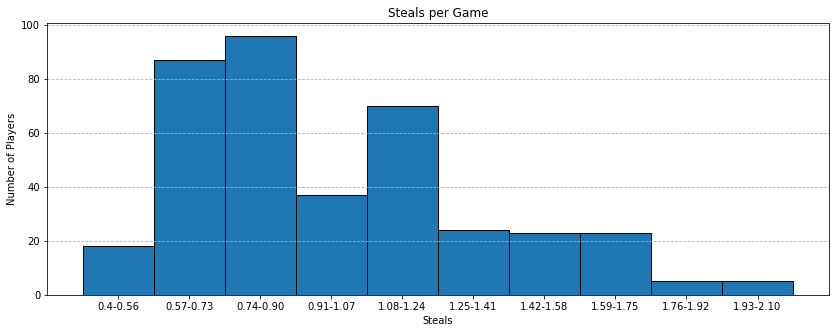

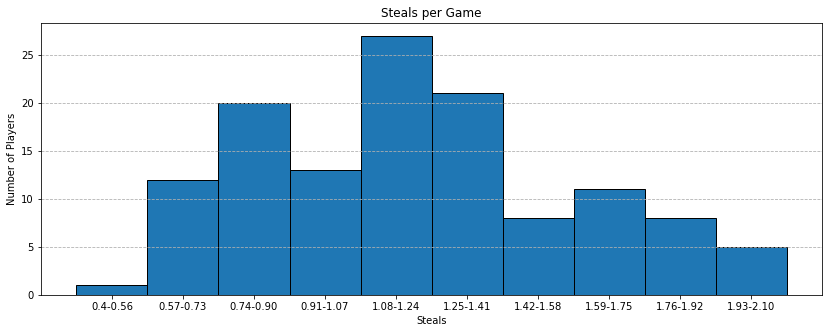

In [39]:
# retrieve data from table
steals = []
allstar_steals = []
for row in basketball_table.data:
    if row[-1] == 'no':
        steals.append(row[5])
    else:
        allstar_steals.append(row[5])
# build cutoffs
cutoffs = utils.compute_equal_width_cutoffs(steals, 10)
steal_freqs = utils.compute_bin_frequencies(steals, cutoffs)
allstar_steal_freqs = utils.compute_bin_frequencies(allstar_steals, cutoffs)
# set up axis
x_axis = []
for i in range(len(cutoffs)-2):
    x_axis.append(f"{cutoffs[i]}-{format(cutoffs[i+1]-0.01, '.2f')}")
x_axis.append(f"{cutoffs[i+1]}-{format(cutoffs[i+2], '.2f')}")
# plot
plot_utils.bar_chart(x_axis, steal_freqs, 'Steals per Game', 'Steals', 'Number of Players', grouped=True)
plot_utils.bar_chart(x_axis, allstar_steal_freqs, 'Steals per Game', 'Steals', 'Number of Players', grouped=True)

## Steals per Game Analysis
#### Non-allstar
The mode of the data is 0.8-0.99 followed by 1-1.19, then 0.6-0.79.  
Although the data looks fairly normal around the mean and mode, the data is skewed left, easy to see as there are several more bins to the right of the mode than to the left.
#### Allstar
Again, the data is further shifted toward the center. Higher values are more consistent and more values in the middle of the pack.

### Code and Graph for Win Shares

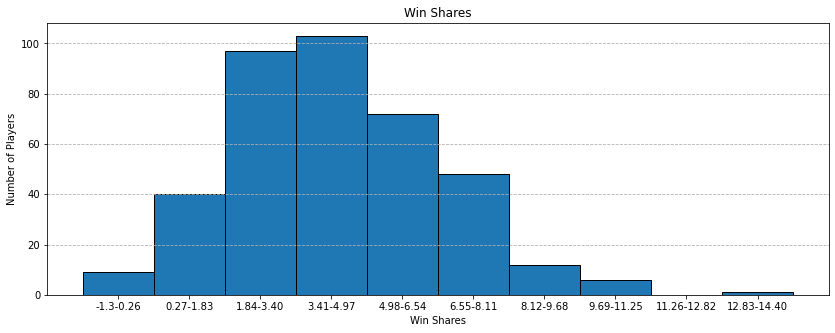

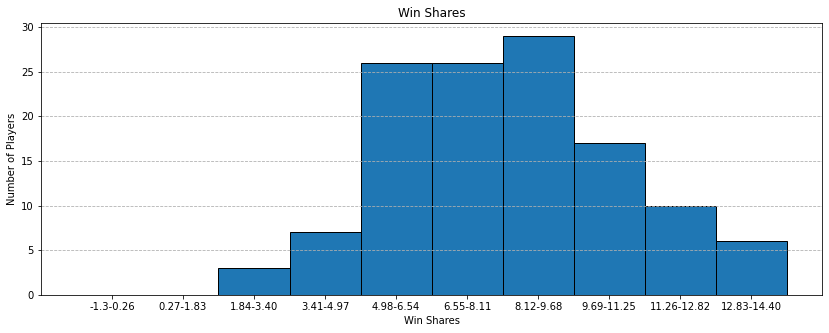

In [40]:
# retrieve data from table
win_shares = []
allstar_ws = []
for row in basketball_table.data:
    if row[-1] == 'no':
        win_shares.append(row[10])
    else:
        allstar_ws.append(row[10])
# build cutoffscutoffs = utils.compute_equal_width_cutoffs(win_shares, 10)
cutoffs = utils.compute_equal_width_cutoffs(win_shares, 10)
ws_freqs = utils.compute_bin_frequencies(win_shares, cutoffs)
allstar_ws_freqs = utils.compute_bin_frequencies(allstar_ws, cutoffs)
x_axis = []
for i in range(len(cutoffs)-2):
    x_axis.append(f"{cutoffs[i]}-{format(cutoffs[i+1]-0.01, '.2f')}")
x_axis.append(f"{cutoffs[i+1]}-{format(cutoffs[i+2], '.2f')}")
plot_utils.bar_chart(x_axis, ws_freqs, 'Win Shares', 'Win Shares', 'Number of Players', grouped=True)
plot_utils.bar_chart(x_axis, allstar_ws_freqs, 'Win Shares', 'Win Shares', 'Number of Players', grouped=True)

## Win Share Analysis
#### Non-allstar
The mode is located at 3.77-5.45. This is followed by 2.08-376 to the left and 5.46-7.14 to the right respectively.  
Surpringsingly the highest win share category (13.91-15.60) is *not* the least common, the category directly before that is.  
Like the previous two graphs, this chart is left skewed, albeit less skewed than before.
#### Allstar
Yet again, the data is shifted right for the Allstars. The Allstar data is almost a mirror image of non-allstar data.  
The highest percentage category is much more popular (relatively).
